<a href="https://colab.research.google.com/github/shahrameshv/NN/blob/master/Credit_card_fraud_detection_Starter_code%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Submitted by - Ramesh Shah**

**TO DO**
- #### We will build a ML model which will be capable of detecting fraudulent transactions and also understood how to handle class imbalances present in any data set, along with model selection and hyperparameter tuning.
- #### Data will be split into Train and Test data to check the performance of models with unseen data. For validation we will use k-fold cross-validation method.


## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
# Importing required libraries for various evaluation and performance

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from imblearn import over_sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
#setting standard column display size and warning
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [7]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Project_data/creditcard.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 31)

In [180]:
#observe the different feature type present in the data - Describe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [182]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


## Missing Values

### <b>Observation: No missing value found in present dataset</b>

In [183]:
# Checking for the missing value.
df.isnull().sum().sort_values(ascending = False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

Here we will observe the distribution of our classes

In [184]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100,2)
print('Normal Share: ',normal_share)
print('Fraud share: ',fraud_share)

Normal Share:  99.83
Fraud share:  0.17


### Observation: There is only 0.17% of fraud share, this Dataset is highly imbalance.

In [15]:
# Count of Fraud and non-fraudulent data in dataset, 0 represents non-fraud and 1 represents in fraud data
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

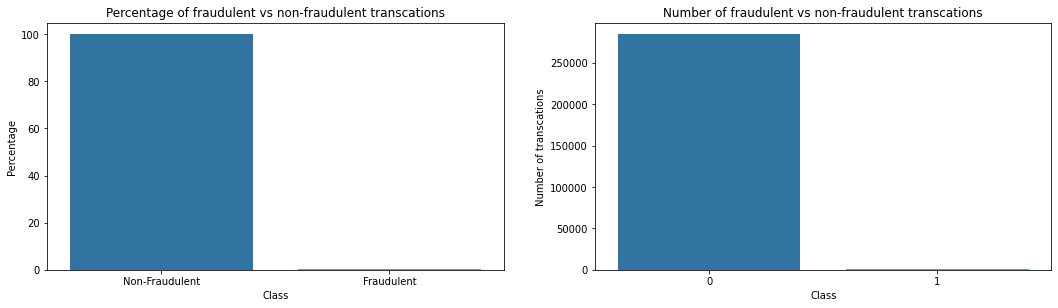

In [186]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(18,10))

# Percentage of fraudlent v non fraudlent transactions
plt.subplot(2,2,1)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
transaction_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_transaction_percentage = pd.DataFrame(transaction_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_transaction_percentage)

plt.subplot(2,2,2)

# Number of fraudlent v non fraudlent transactions
sns.countplot(x='Class', data=df)
plt.ylabel("Number of transcations")
plt.xlabel("Class")
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

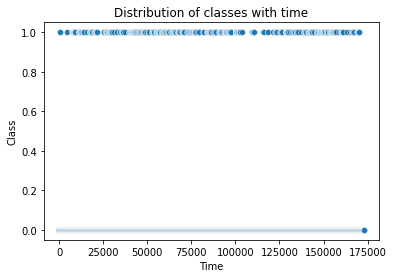

In [17]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df['Time'], y=df['Class'])
plt.title('Distribution of classes with time')
plt.show()

Observation: Scatter Plot: We cannot infer much information as current data is distributed over time.

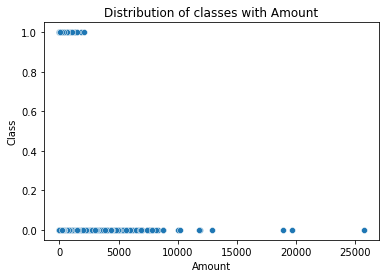

In [18]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df['Amount'], y=df['Class'])
plt.title('Distribution of classes with Amount')
plt.show()

Observation: Scatter Plot: Distribution of classes with Amount - We can observe that Low amount transactions are highly fradulent than high amount transcations.

In [19]:
# Drop unnecessary columns
# Dropping Time column as it is of no value while building the model
df_new = df.drop('Time',axis=1)

Time column dropped as it is not going to assist in model building


In [20]:
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [21]:
# Feature variable in X and target variable in y
y = df_new['Class']
X = df_new.drop("Class", axis = 1)

In [22]:
# Split data into Train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [23]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

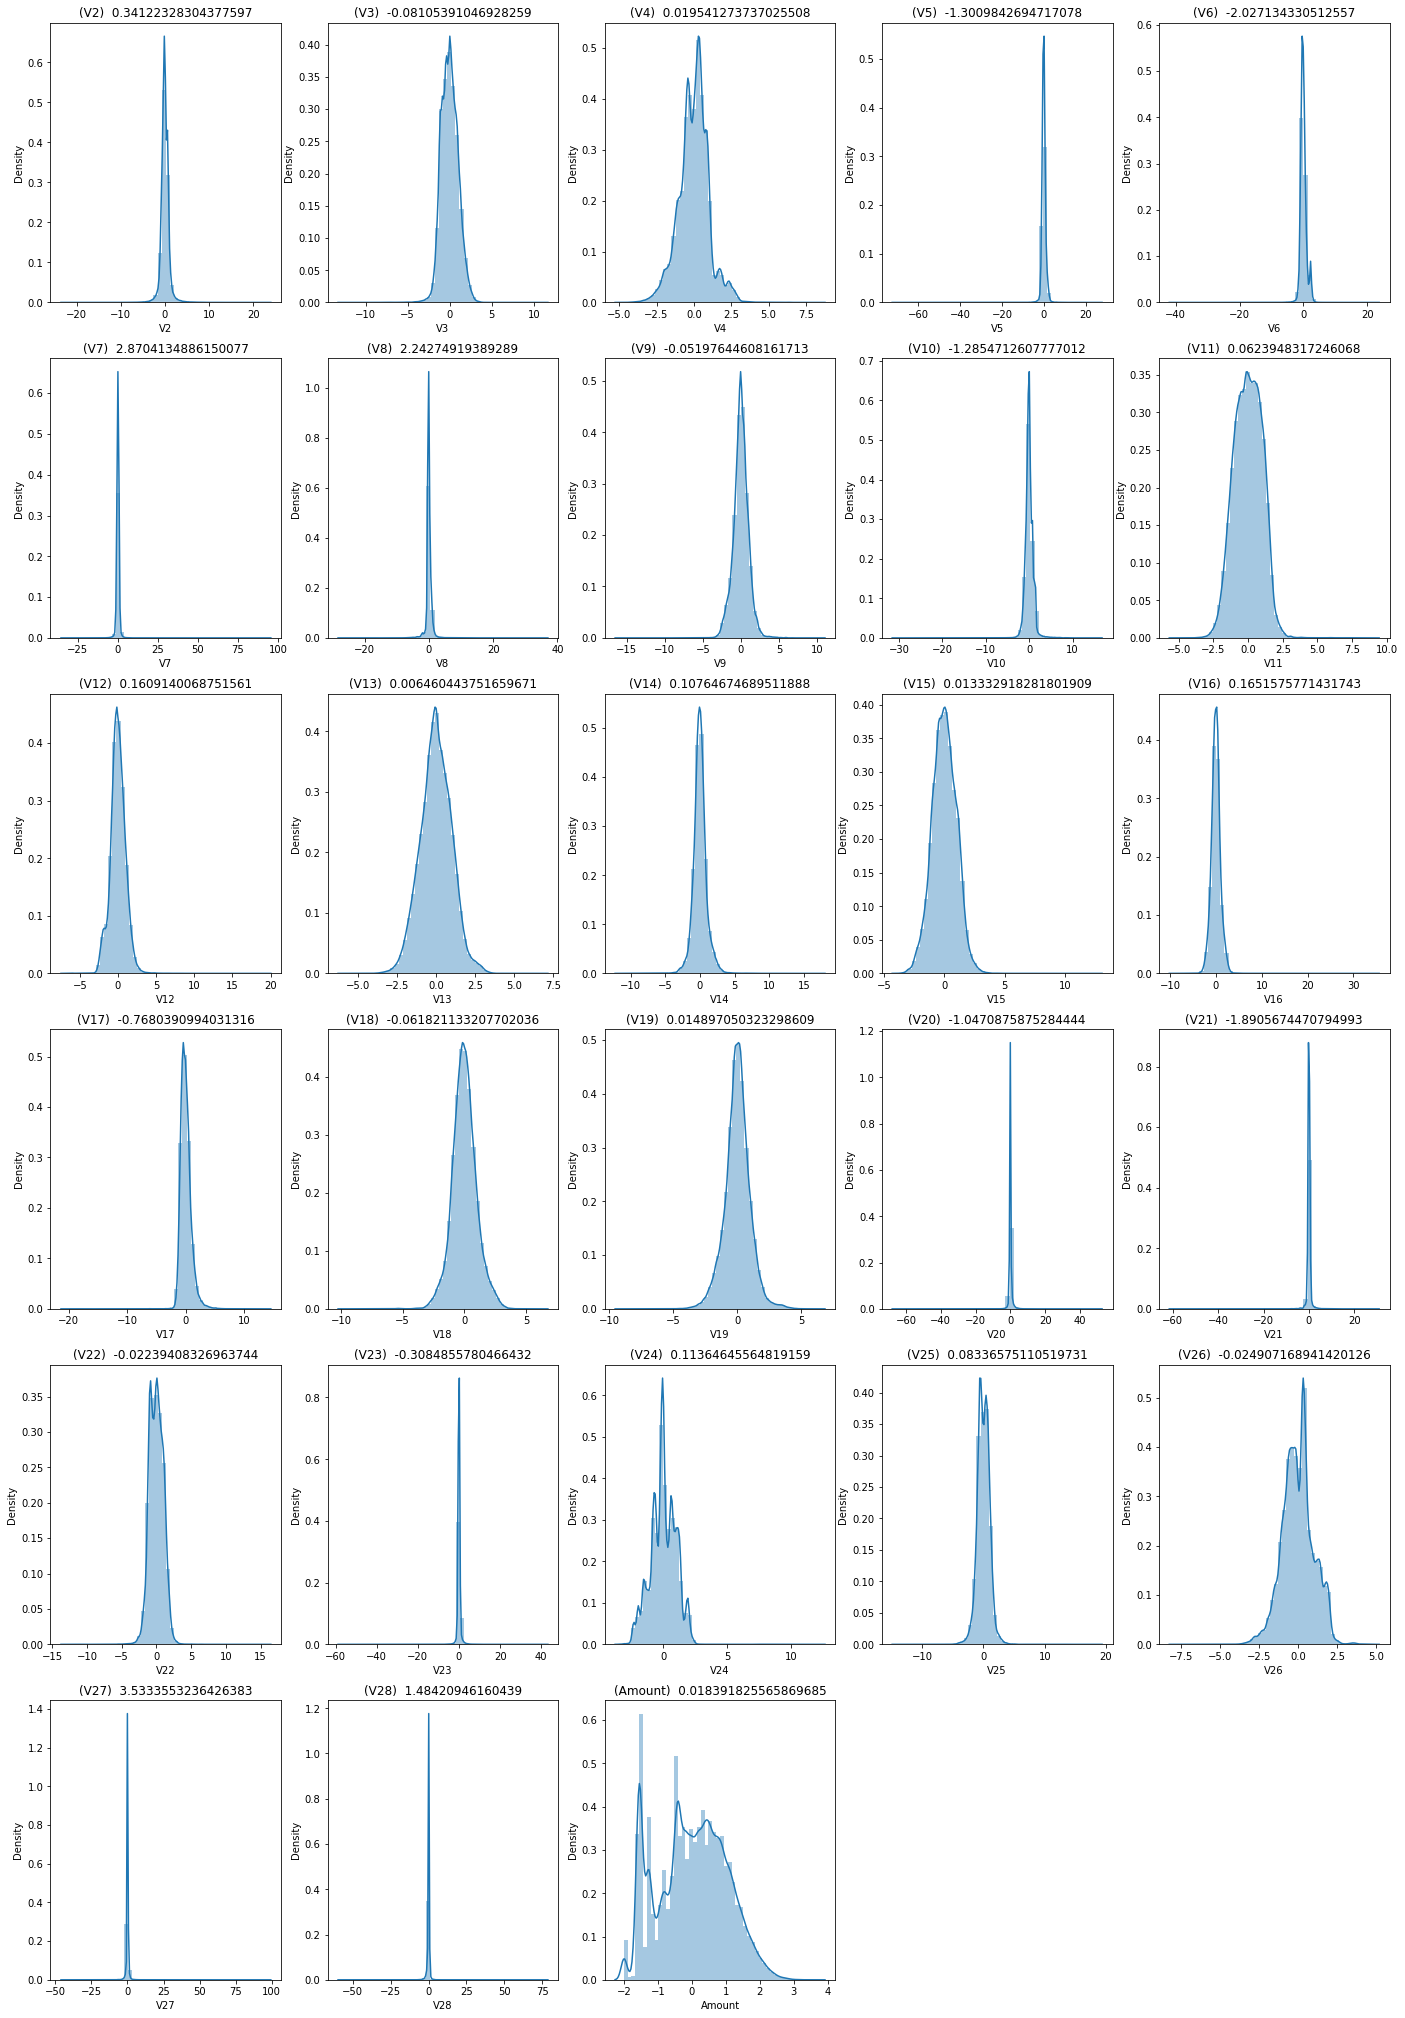

In [188]:
# plot the histogram of a variable from the dataset to see the skewness
cols = X_train.columns
plt.figure(figsize=(24,36))
for col in range(1,len(cols)) :    
    plt.subplot(6, 5,col)    
    val = cols[col]
    sns.distplot(X_train[val])    
    plt.title('('+cols[col]+')  '+str(X_train[val].skew()))
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [25]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

 # Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

# transform test data 
X_test[cols] = pt.transform(X_test[cols])


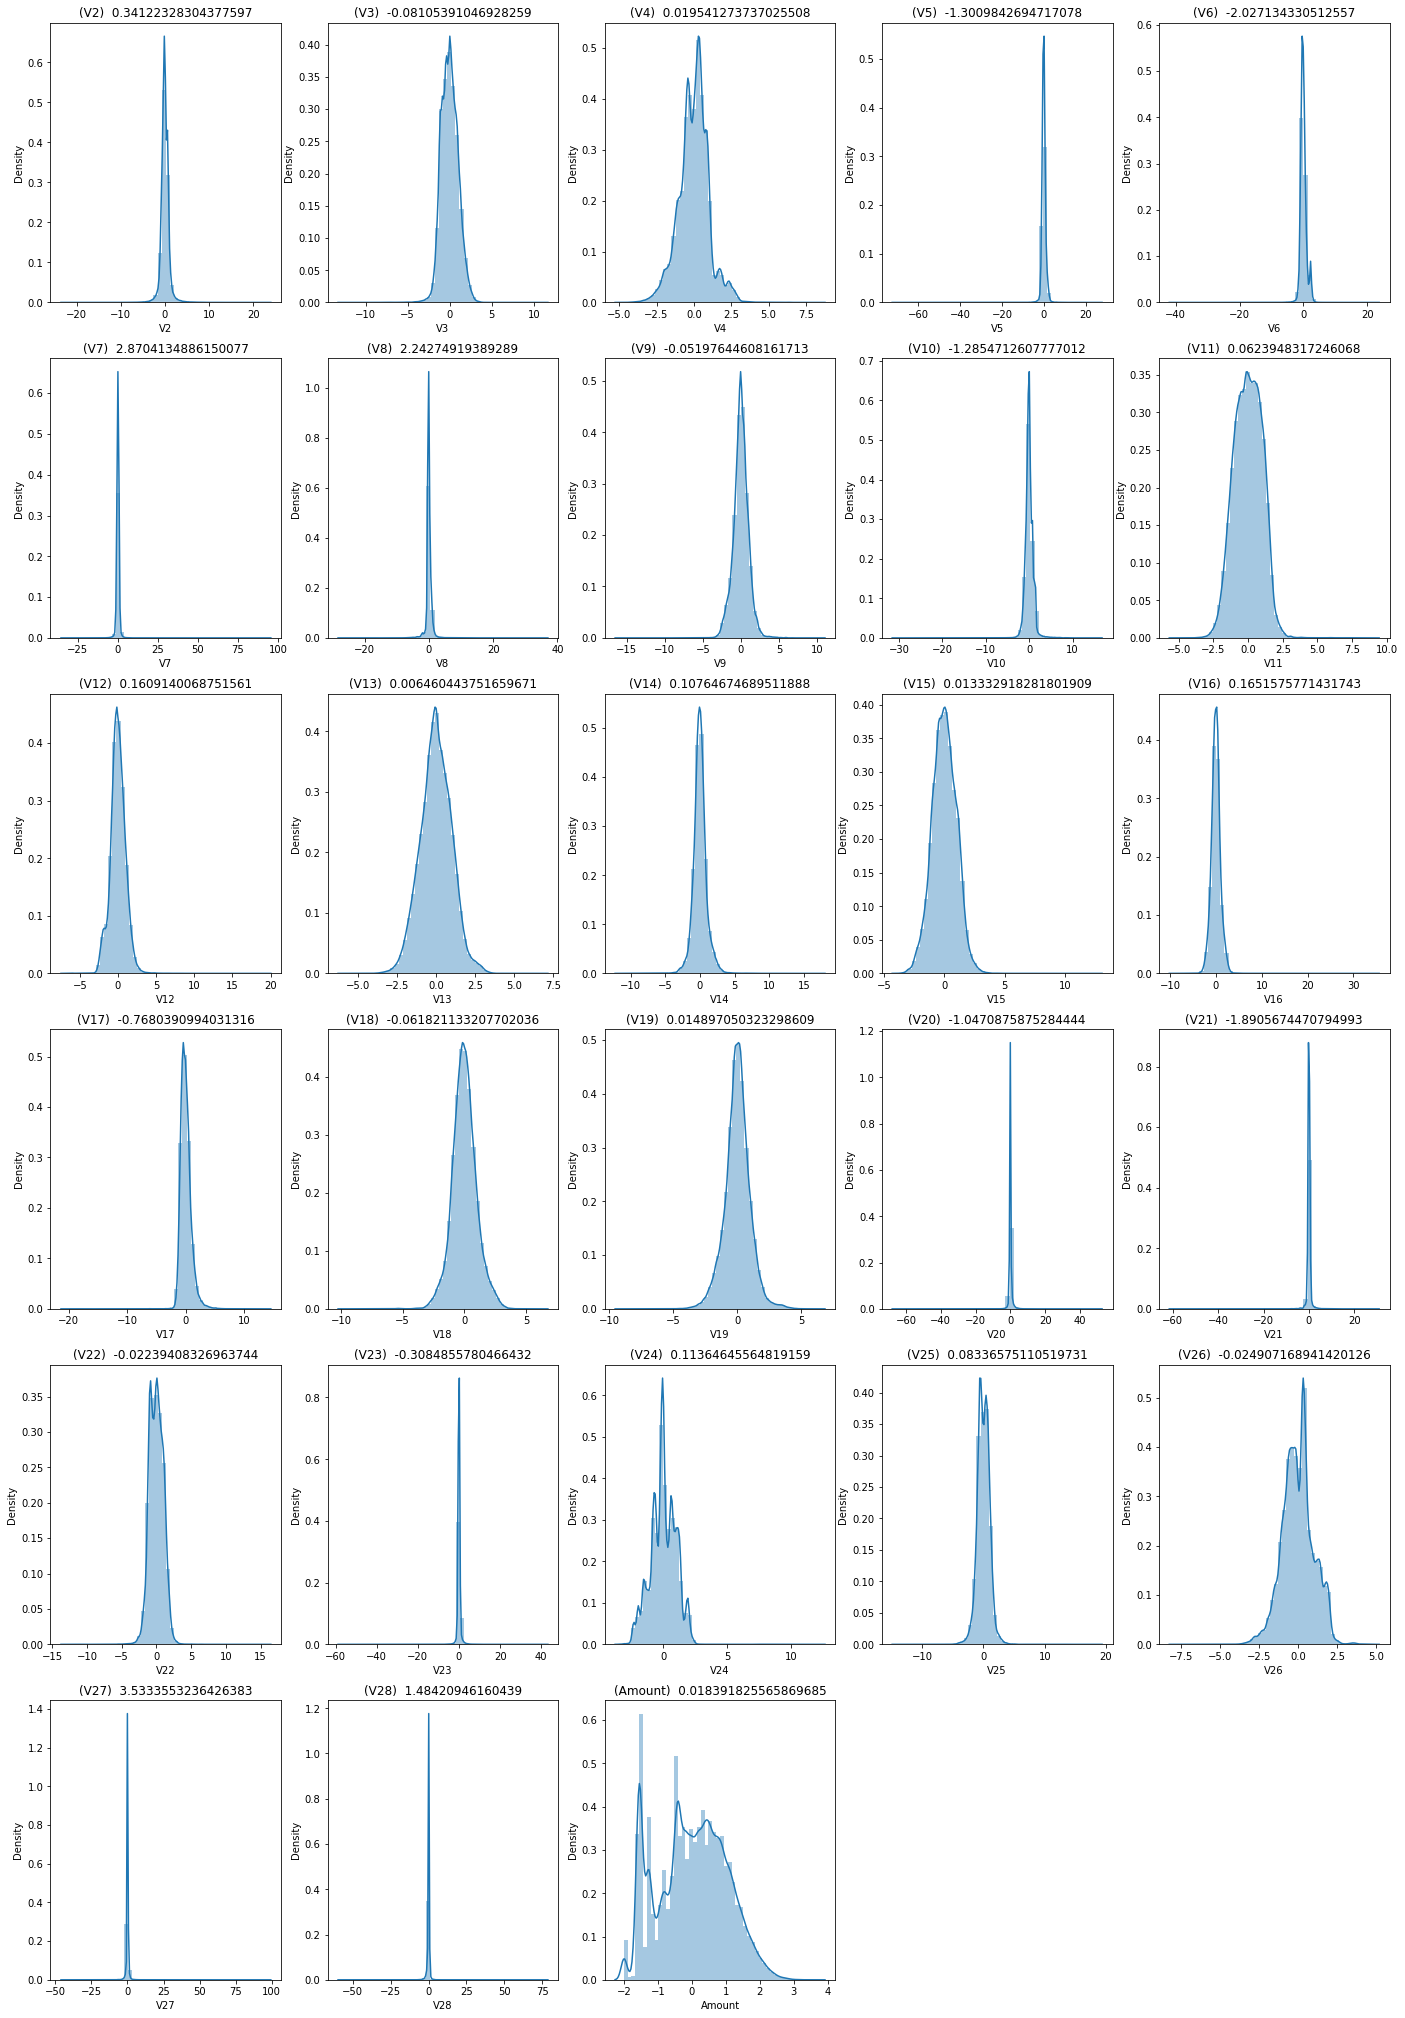

In [189]:
# plot the histogram of a variable from the dataset again to see the result 
skwed = X_train.columns
plt.figure(figsize=(24,36))
for col in range(1,len(skwed)) :    
    plt.subplot(6, 5,col)    
    val = skwed[col]
    sns.distplot(X_train[val])    
    plt.title('('+cols[col]+')  '+str(X_train[val].skew()))
plt.show()

## Observation: Clearly observed that all the variables are normally distributed.

## Model Building
- Build different models on the imbalanced dataset and see the result

# logistic regression

In [27]:
# Perform cross validation by creating KFold object with 5 splits.
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify param grid
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Gridsearch CV - scoring roc_auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model. #perform hyperparameter tuning

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [28]:
# Identify and print evaluation result by choosing a evaluation metric
print('ROC AUC score: ', model_cv.best_score_)
# print the optimum value of hyperparameters
print('Hyperparameters: ', model_cv.best_params_)

ROC AUC score:  0.9835463116331988
Hyperparameters:  {'C': 0.01}


In [29]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.914993,0.041196,0.025315,0.001080,0.01,{'C': 0.01},0.986658,0.987359,0.967658,0.982004,0.994052,0.983546,0.008825,1,0.983753,0.984446,0.988652,0.985593,0.982902,0.985069,0.001996
1,1.284091,0.067689,0.026709,0.002773,0.1,{'C': 0.1},0.985772,0.987293,0.959771,0.979933,0.992733,0.981100,0.011417,2,0.982067,0.983479,0.988109,0.983861,0.980780,0.983659,0.002478
2,1.312822,0.045393,0.025349,0.000752,1,{'C': 1},0.985476,0.986960,0.957247,0.979033,0.991993,0.980142,0.012172,3,0.981391,0.982985,0.987677,0.983116,0.980025,0.983038,0.002582
3,1.339757,0.072094,0.027856,0.004242,10,{'C': 10},0.985443,0.986895,0.956955,0.978929,0.991909,0.980026,0.012257,4,0.981298,0.982918,0.987621,0.983019,0.979933,0.982958,0.002594
4,1.372741,0.073812,0.025785,0.001328,100,{'C': 100},0.985443,0.986888,0.956916,0.978920,0.991896,0.980013,0.012269,5,0.981290,0.982911,0.987616,0.983009,0.979923,0.982950,0.002596
5,1.350585,0.013366,0.025568,0.000450,1000,{'C': 1000},0.985442,0.986888,0.956916,0.978919,0.991894,0.980012,0.012269,6,0.981290,0.982910,0.987616,0.983008,0.979922,0.982949,0.002596


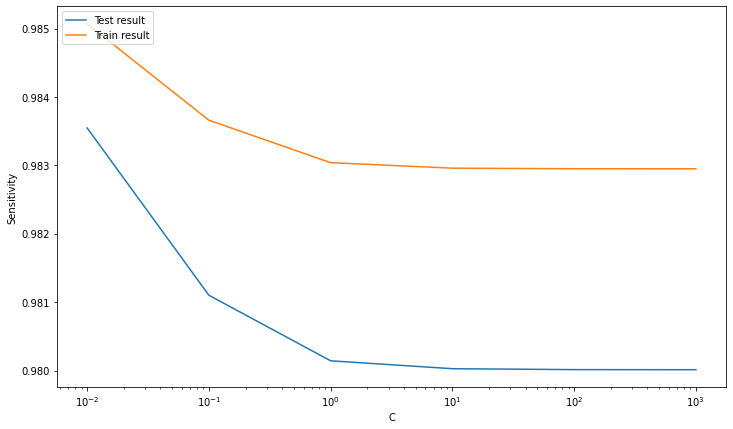

In [190]:
# plot of C versus train and validation scores
plt.figure(figsize=(12, 7))

plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Sensitivity')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

## Logistic regression with optimal C on imbalanced data

In [31]:
# Instantiating the model with best C
lr_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
lr_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [32]:
# Prediction
# Predictions on the train set
y_train_pred = lr_imb_model.predict(X_train)

In [33]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227427     22]
 [   135    261]]


In [34]:
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [35]:
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_train, y_train_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))


Accuracy:  0.9993
F1 Score:  0.77
Sensitivity:  0.66
Specificity:  0.9999


In [36]:
print('Classification report:\n',classification_report(y_train, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [37]:
def plot_roccurve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [38]:
# Predicted probability
y_train_pred_proba = lr_imb_model.predict_proba(X_train)[:,1]

ROC AUC Score: 0.9849442772185892



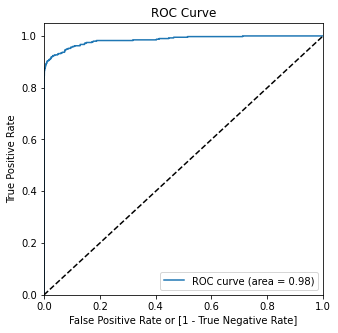

In [39]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_train, y_train_pred_proba))+'\n')

plot_roccurve(y_train, y_train_pred_proba)

Observation - ROC curve on training set area=0.98

## Prediction
- Test set

In [40]:
# Prediction on the test set
y_test_pred = lr_imb_model.predict(X_test)

In [41]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    16]
 [   42    54]]


In [42]:
TP = confusion[1,1] # true positive
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [43]:
# Test Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_test, y_test_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_train, y_train_pred),2))

# Sensitivity 
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

Accuracy:  0.999
F1 Score:  0.77
Sensitivity:  0.56
Specificity:  0.9997


In [44]:
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [45]:
# Predicted probability
y_test_pred_proba = lr_imb_model.predict_proba(X_test)[:,1]

ROC AUC Score: 0.9849442772185892



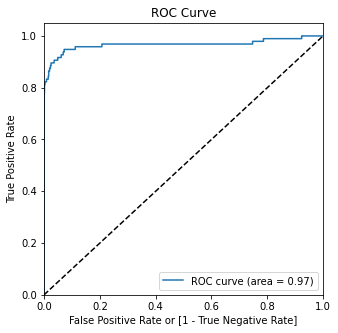

In [46]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_train, y_train_pred_proba))+'\n')
plot_roccurve(y_test, y_test_pred_proba)

## ROC curve on Test set (area=0.97)

## Logistic Regression - Model summary
### Train set score in percentage
- Accuracy:  99.93 %
- F1 Score:  77.06 %
- Sensitivity:  66 %
- Specificity:  99.99 %

### Test set score in percentage
- Accuracy:  99 % 
- F1 Score:  65 % 
- Sensitivity:  56 % 
- Specificity:  99.9 %


Observation: As model learnt well during training set and performed well in test set.

# Decision Tree Classifier  on imbalanced data

In [47]:
# create param grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

folds = 3

# Instantiate grid search decsion tree classifier  model
tree = DecisionTreeClassifier()

# Cross validation with 
grid_search_cv = GridSearchCV(estimator = tree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = folds, 
                           verbose = 1)

# Fit the grid search to the data
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [48]:
# Optimal ROC curve score and hyperparameter
print('ROC AUC score: ', round(grid_search_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', grid_search_cv.best_params_)

ROC AUC score:  0.938
Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [49]:
# cross validation results
grid_search_cv_results = pd.DataFrame(grid_search_cv.cv_results_)
grid_search_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.532568,0.022882,0.024923,0.000719,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923868,0.930130,0.004428,5
1,3.529328,0.013314,0.024469,0.000548,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923878,0.930132,0.004423,4
2,3.496501,0.014598,0.024403,0.000260,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933282,0.936720,0.944598,0.938200,0.004737,1
3,3.468501,0.019966,0.024972,0.000293,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,2
4,6.902400,0.021804,0.026523,0.000224,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.932361,0.923903,0.930464,0.928909,0.003624,6
5,6.870038,0.044918,0.027741,0.002053,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.932362,0.923879,0.938036,0.931426,0.005818,3
6,6.803631,0.017726,0.027469,0.000666,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933435,0.919693,0.921739,0.924956,0.006054,8
7,6.876828,0.034256,0.027220,0.000534,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933449,0.919673,0.921763,0.924962,0.006062,7


In [50]:
# Optimal hyperparameters - Decsion tree classifier Model

dtc_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dtc_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

### Prediction on
- Train data set 

In [51]:
y_train_pred = dtc_imb_model.predict(X_train)

In [52]:
# Confusion matrix - dtc
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227374     75]
 [   114    282]]


In [53]:
TP = confusion[1,1] # true positive 
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [54]:
# Train set
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_train, y_train_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

Accuracy:  0.9992
F1 Score:  0.75
Sensitivity:  0.71
Specificity:  0.9997


In [55]:
print('Classification report:\n',classification_report(y_train, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [56]:
# Predicted probability
y_train_pred_proba = dtc_imb_model.predict_proba(X_train)[:,1]

ROC AUC Score: 0.9534547393930157



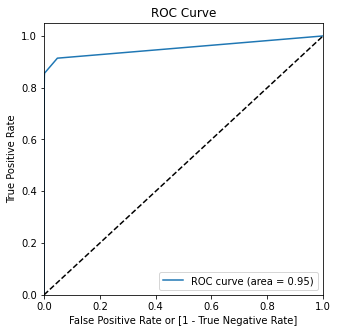

In [57]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_train, y_train_pred_proba))+'\n')
plot_roccurve(y_train, y_train_pred_proba)

### Prediction
- Test set

In [58]:
y_test_pred = dtc_imb_model.predict(X_test)

In [59]:
# Confusion matrix - dtc
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [60]:
TP = confusion[1,1] # true positive 
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [61]:
# Test set
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_test, y_test_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

Accuracy:  0.9988
F1 Score:  0.62
Sensitivity:  0.58
Specificity:  0.9995


In [62]:
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [63]:
# Predicted probability
y_test_pred_proba = dtc_imb_model.predict_proba(X_test)[:,1]

ROC AUC Score: 0.92174979703748



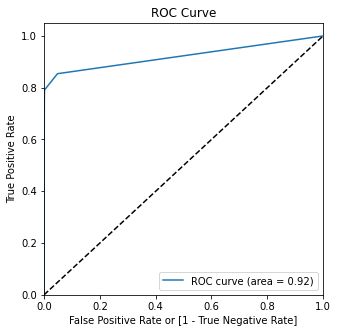

In [64]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_test, y_test_pred_proba))+'\n')
plot_roccurve(y_test, y_test_pred_proba)

## Decision Tree Classifier  - Model summary
### Train set score in percentage
- Accuracy:  99.92 %
- F1 Score:  75 %
- Sensitivity:  71 %
- Specificity:  99.97 %

### Test set score in percentage
- Accuracy:  99.88 %
- F1 Score:  62 %
- Sensitivity:  58 %
- Specificity:  99.95 %

# Random Forest Classifier on imbalanced data 

In [65]:
 # Specified param grid for  cv after importing ensamble library which contains RandomForestClassifier.

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

# Base model
rfc = RandomForestClassifier()
# Initialisation of grid search model
rfc_grid_search = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
rfc_grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [66]:
# ROC curve score and hyperparameter - Optimal
print('ROC AUC score: ', round(rfc_grid_search.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', rfc_grid_search.best_params_)

ROC AUC score:  0.999
Hyperparameters:  {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [67]:
# Best hyperparameter
rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=300)

In [68]:
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

## Prediction
- train set

In [69]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [70]:
# Confusion matrix - RFC
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227407     42]
 [   100    296]]


In [71]:
TP = confusion[1,1] # true positive 
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [72]:
# Train set RFC
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_train, y_train_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

Accuracy:  0.9994
F1 Score:  0.81
Sensitivity:  0.75
Specificity:  0.9998


In [73]:
print('Classification report:\n',classification_report(y_train, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.88      0.75      0.81       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [74]:
# Predicted probability
y_train_pred_proba = dtc_imb_model.predict_proba(X_train)[:,1]

ROC AUC Score: 0.9534547393930157



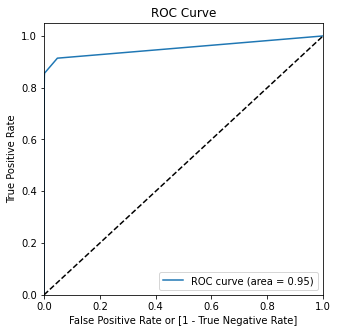

In [75]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_train, y_train_pred_proba))+'\n')
plot_roccurve(y_train, y_train_pred_proba)

## Prediction
- Test set

In [76]:
# RFC - Predictions on the test set 
y_test_pred = rfc_imb_model.predict(X_test)

In [77]:
# Confusion matrix - dtc
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56843    23]
 [   35    61]]


In [78]:
TP = confusion[1,1] # true positive 
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [79]:
# Test set
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_test, y_test_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

Accuracy:  0.999
F1 Score:  0.68
Sensitivity:  0.64
Specificity:  0.9996


In [80]:
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.64      0.68        96

    accuracy                           1.00     56962
   macro avg       0.86      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [81]:
# Predicted probability
y_test_pred_proba = dtc_imb_model.predict_proba(X_test)[:,1]

ROC AUC Score: 0.92174979703748



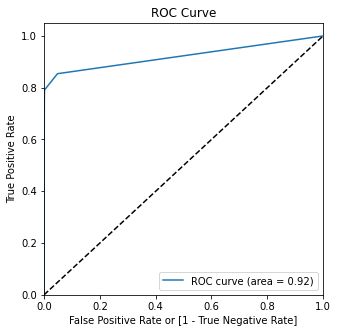

In [82]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_test, y_test_pred_proba))+'\n')
plot_roccurve(y_test, y_test_pred_proba)

## RandomForest Classifier  - Model summary - Imbalanced data set
### Train set score in percentage
- Accuracy:  99.94 %
- F1 Score:  81 %
- Sensitivity:  74 %
- Specificity:  99.98 %

### Test set score in percentage
- Accuracy:  99.9 %
- F1 Score:  69 %
- Sensitivity:  65 %
- Specificity:  99.96 %


# XGBoost on imbalance dataset

In [83]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
xgb_model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [84]:
# Optimal ROC curve score and hyperparameter XgBoost
print('ROC AUC score: ', round(xgb_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', xgb_model_cv.best_params_)
print(xgb_model_cv.best_estimator_)

ROC AUC score:  0.978
Hyperparameters:  {'learning_rate': 0.2, 'subsample': 0.3}
XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.3)


In [85]:
# cross validation results
xgb_cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
xgb_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.042632,0.554036,0.369148,0.003556,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1,0.999894,0.999940,0.999847,0.999894,0.000038
1,42.223669,0.020201,0.374595,0.004668,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976568,0.972788,0.977688,0.975682,0.002096,3,0.999965,0.999987,0.999966,0.999973,0.000010
2,46.104949,0.299485,0.364731,0.004359,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2,0.999950,0.999983,0.999911,0.999948,0.000029
3,32.590907,0.135814,0.381573,0.003362,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.968098,0.974481,0.973309,0.971963,0.002774,6,1.000000,1.000000,0.999995,0.999998,0.000002
4,41.304241,0.287144,0.387355,0.002464,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.968621,0.965527,0.982247,0.972132,0.007263,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,44.546904,0.020523,0.381717,0.002029,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973489,0.000539,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [86]:
# model with best hyperparameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

## Prediction
- Train set

In [87]:
y_train_pred = xgb_imb_model.predict(X_train)
print('Classification report:\n',classification_report(y_train, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.96      0.85      0.90       396

    accuracy                           1.00    227845
   macro avg       0.98      0.93      0.95    227845
weighted avg       1.00      1.00      1.00    227845



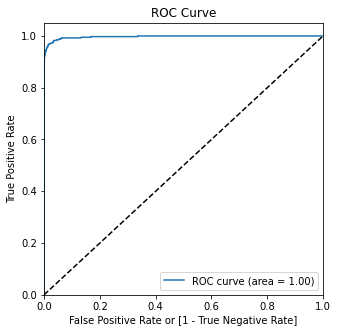

In [88]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
plot_roccurve(y_train, y_train_pred_proba_imb_xgb)

## Prediction
- test set

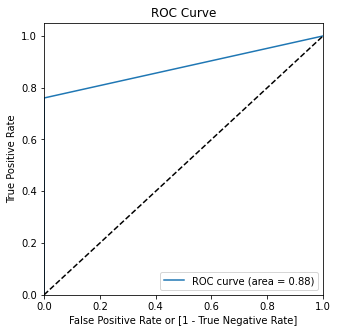

In [89]:
y_test_pred = xgb_imb_model.predict(X_test)
plot_roccurve(y_test, y_test_pred)

In [90]:
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



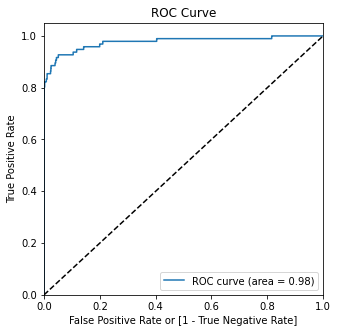

In [91]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## XGBOOST  - Model summary on imbalanced data set
### Train set score 
- ROC score 100 %
- F1 score 90%

### Test set score
- ROC score 98 %
- F1 score 80 %

Observation: XGBoost has given good result on imbalanced data.  ROC-AUC train= 100% and Test = 98%</b>

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


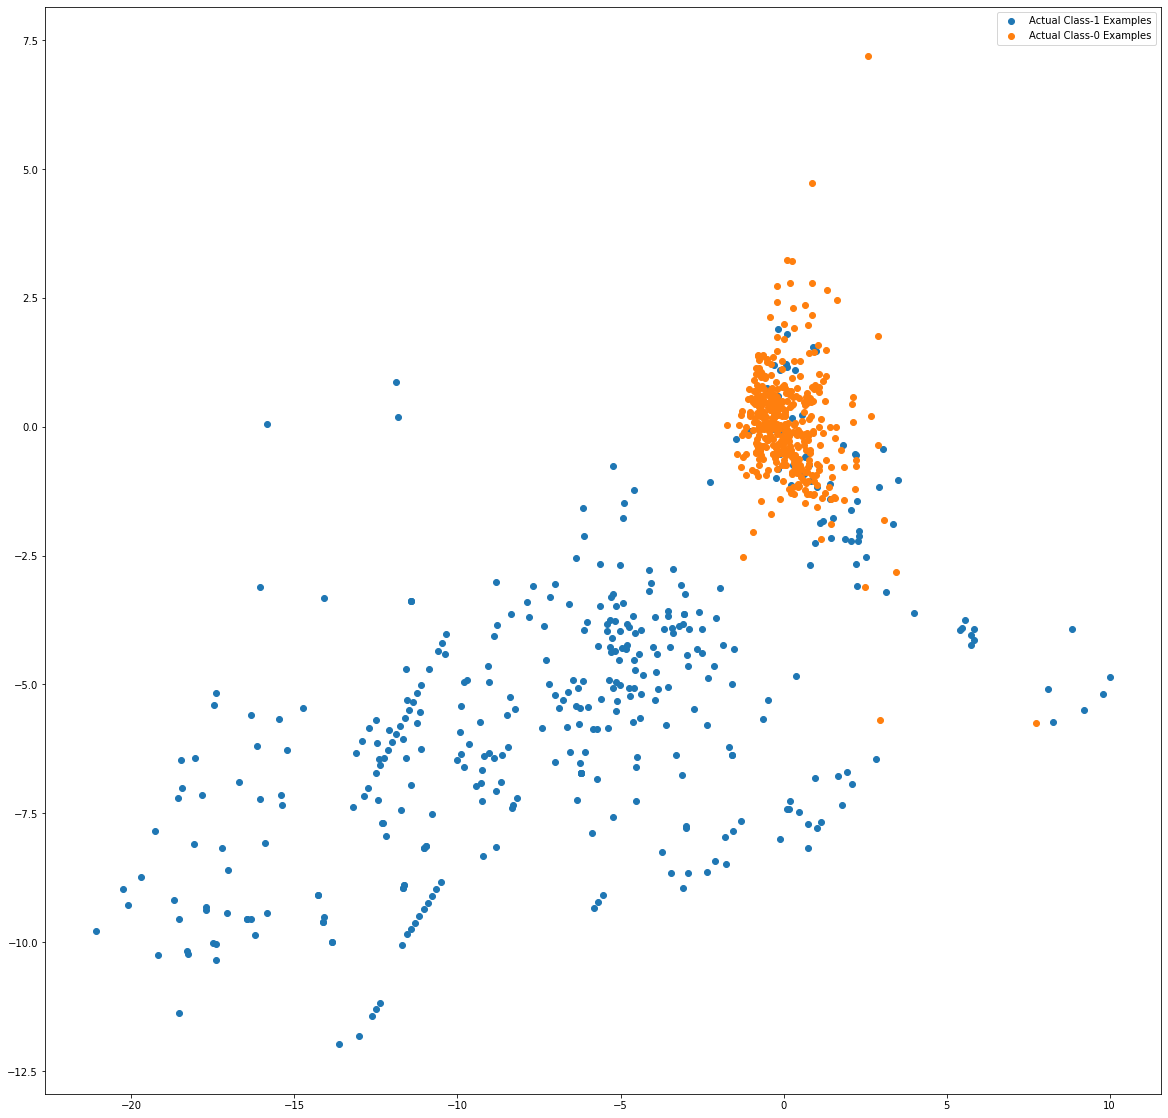

In [92]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

# Random Oversampling

In [93]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [94]:
# Befor sampling class distribution
print('Before sampling class distribution: ',Counter(y_train))
# new class distribution 
print('\nNew class distribution: ',Counter(y_over))

Before sampling class distribution:  Counter({0: 227449, 1: 396})

New class distribution:  Counter({0: 227449, 1: 227449})


## Logistic Regression - with random oversampling

In [95]:
# Creating KFold object with 5 splits
splits = 5
folds = KFold(n_splits=splits, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
lr_ros_model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_ros_model_cv.fit(X_over, y_over)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [96]:
# Optimal ROC curve score and hyperparameter XgBoost
print('ROC AUC score: ', round(lr_ros_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', lr_ros_model_cv.best_params_)
print(lr_ros_model_cv.best_estimator_)

ROC AUC score:  0.989
Hyperparameters:  {'C': 0.1}
LogisticRegression(C=0.1)


In [97]:
# cross validation results
lr_ros_cv_results = pd.DataFrame(lr_ros_model_cv.cv_results_)
lr_ros_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.575433,0.104903,0.041073,0.001183,0.01,{'C': 0.01},0.988797,0.988295,0.988779,0.988982,0.988739,0.988718,0.000228,6,0.988770,0.988778,0.988666,0.988772,0.988703,0.988738,0.000045
1,2.644774,0.089391,0.043636,0.002233,0.1,{'C': 0.1},0.988827,0.988311,0.988765,0.988991,0.988747,0.988728,0.000226,1,0.988789,0.988788,0.988671,0.988781,0.988713,0.988749,0.000048
2,2.678273,0.156692,0.044200,0.005508,1,{'C': 1},0.988829,0.988310,0.988761,0.988992,0.988745,0.988727,0.000226,5,0.988790,0.988788,0.988669,0.988781,0.988713,0.988748,0.000049
3,2.687470,0.137986,0.047435,0.007757,10,{'C': 10},0.988828,0.988310,0.988762,0.988993,0.988745,0.988728,0.000226,4,0.988790,0.988789,0.988669,0.988781,0.988713,0.988748,0.000049
4,2.686658,0.160845,0.042007,0.002040,100,{'C': 100},0.988828,0.988311,0.988762,0.988993,0.988745,0.988728,0.000226,3,0.988790,0.988789,0.988669,0.988781,0.988713,0.988748,0.000049
5,2.689181,0.167197,0.040946,0.001188,1000,{'C': 1000},0.988828,0.988310,0.988762,0.988993,0.988745,0.988728,0.000226,2,0.988790,0.988789,0.988669,0.988781,0.988713,0.988748,0.000049


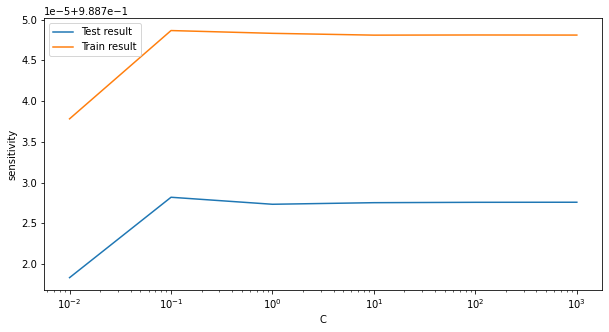

In [98]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 5))
plt.plot(lr_ros_cv_results['param_C'], lr_ros_cv_results['mean_test_score'])
plt.plot(lr_ros_cv_results['param_C'], lr_ros_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

In [99]:
print(lr_ros_model_cv.best_params_)

{'C': 0.1}


In [100]:
# Instantiating the model
logreg_oversample = LogisticRegression(C=0.1)

# Fitting the model with train data
logreg_oversample_model = logreg_oversample.fit(X_over, y_over)

## Evaluation
- Train set

In [101]:
# Predictions on the train set
y_train_pred = logreg_oversample_model.predict(X_over)
print('Classification report:\n',classification_report(y_over, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



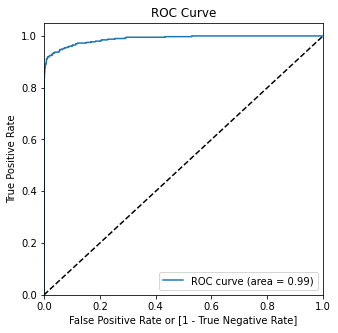

In [102]:
# Predicted probability
y_train_pred_proba = logreg_oversample_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
plot_roccurve(y_over, y_train_pred_proba)

## Evaluation
- Test set

In [103]:
# Evaluating on test data
y_test_pred = logreg_oversample_model.predict(X_test)

print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



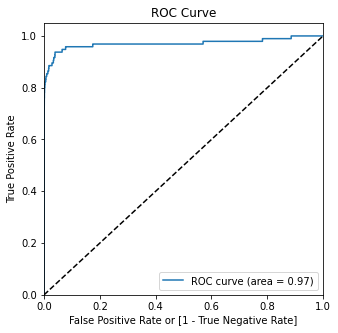

In [104]:
# Predicted probability
y_test_pred_proba = logreg_oversample_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Logistic regression  with random oversampleing - Model summary 
### Train set score 
- ROC score 99 %
- F1 score 95%

### Test set score
- ROC score 97 %
- F1 score 11 %


observation: Huge difference between train and test F1 score 

# Decision Tree Classifier with Random oversampling

In [105]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree_os = DecisionTreeClassifier()

dtree_os_grid_search = GridSearchCV(estimator = dtree_os, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
dtree_os_grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [106]:
# Optimal ROC curve score and hyperparameter decision tree classifier 
print('ROC AUC score: ', round(dtree_os_grid_search.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', dtree_os_grid_search.best_params_)
print(dtree_os_grid_search.best_estimator_)

ROC AUC score:  1.0
Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [107]:
# cross validation results
dtree_os_cv_results = pd.DataFrame(dtree_os_grid_search.cv_results_)
dtree_os_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.920550,0.036154,0.077707,0.008734,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990093,0.990686,0.990948,0.990576,0.000357,6
1,5.924062,0.024217,0.074182,0.004343,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990093,0.990683,0.990958,0.990578,0.000361,5
2,5.876027,0.016299,0.071631,0.000701,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990083,0.990559,0.990864,0.990502,0.000321,8
3,5.907595,0.043904,0.069405,0.001735,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990083,0.990559,0.990869,0.990504,0.000323,7
4,9.142504,0.014413,0.071931,0.002198,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999563,0.999616,0.999586,0.999588,0.000022,3
5,9.147723,0.059246,0.069394,0.001239,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999527,0.999652,0.999585,0.999588,0.000051,4
6,9.191887,0.052407,0.069289,0.001570,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999641,0.999670,0.999583,0.999631,0.000036,1
7,9.167337,0.066605,0.064268,0.011296,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999625,0.999650,0.999593,0.999623,0.000023,2


In [108]:
# Model with optimal hyperparameters
dt_oversample_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_oversample_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

## Prediction 
- Train set

In [109]:
# Predictions on the train set
y_train_pred = dt_oversample_model.predict(X_over)
print('Classification report:\n',classification_report(y_over, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



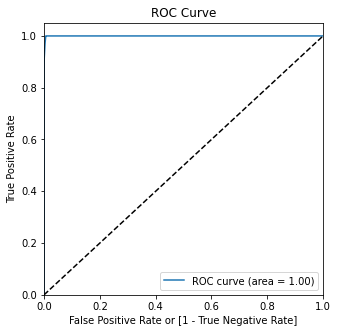

In [110]:
# Predicted probability
y_train_pred_proba = dt_oversample_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
plot_roccurve(y_over, y_train_pred_proba)

## Prediction
- Test set

In [111]:
# Predictions on the train set
y_test_pred = dt_oversample_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.78      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      0.99     56962



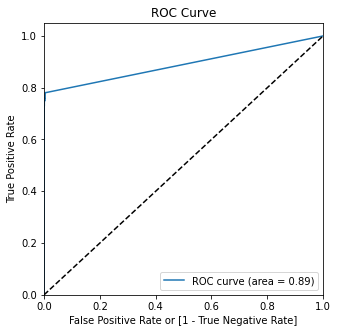

In [112]:
# Predicted probability
y_test_pred_proba = dt_oversample_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Decision tree  with random oversampleing - Model summary 
### Train set score 
- ROC score 100 %
- F1 score 100 %

### Test set score
- ROC score 89 %
- F1 score 26 %

## Model Building
- Build different models on the balanced dataset and see the result

# XGBoost with Random oversampling

In [113]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_over_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xbg_over_model_cv = GridSearchCV(estimator = xgb_over_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
xbg_over_model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [114]:
# Optimal ROC curve score and hyperparameter decision tree classifier 
print('ROC AUC score: ', round(xbg_over_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', xbg_over_model_cv.best_params_)
print(xbg_over_model_cv.best_estimator_)

ROC AUC score:  1.0
Hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.9}
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)


In [115]:
# cross validation results
xbg_over_model_cv_results = pd.DataFrame(xbg_over_model_cv.cv_results_)
xbg_over_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,60.929015,0.156338,0.743476,0.014293,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999921,0.999924,0.999919,0.999921,0.000002,4,0.999933,0.999928,0.999934,0.999932,2.518127e-06
1,71.959102,0.176933,0.733341,0.021127,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999914,0.999920,0.999907,0.999914,0.000005,6,0.999924,0.999926,0.999924,0.999924,9.024263e-07
2,73.648166,0.355273,0.730186,0.006916,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999928,0.999922,0.999911,0.999921,0.000007,5,0.999926,0.999921,0.999930,0.999926,3.552366e-06
3,60.475163,0.110859,0.740053,0.003938,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999991,0.999984,0.999982,0.999986,0.000004,3,0.999998,0.999998,1.000000,0.999999,9.764834e-07
4,71.968807,0.046440,0.727369,0.009226,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999999,0.999984,0.999976,0.999986,0.000010,2,0.999997,0.999999,1.000000,0.999999,1.088431e-06
5,74.195245,0.782381,0.754188,0.001238,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999996,0.999996,0.999977,0.999990,0.000009,1,0.999996,0.999999,1.000000,0.999998,1.577393e-06


In [116]:
# Use optimal hyperparameter build model
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_optimal_model = XGBClassifier(params = params)
xgb_optimal_model.fit(X_over, y_over)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [117]:
# Predictions on the train set
y_train_pred = xgb_optimal_model.predict(X_over)
print('Classification report:\n',classification_report(y_over, y_train_pred))


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



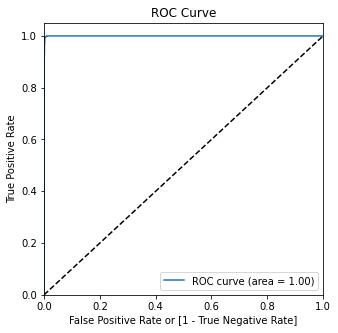

In [118]:
# Predicted probability
y_train_pred_proba = xgb_optimal_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
plot_roccurve(y_over, y_train_pred_proba)

## Model evaluation on Test set

In [119]:
y_pred = xgb_optimal_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.22      0.81      0.35        96

    accuracy                           0.99     56962
   macro avg       0.61      0.90      0.67     56962
weighted avg       1.00      0.99      1.00     56962



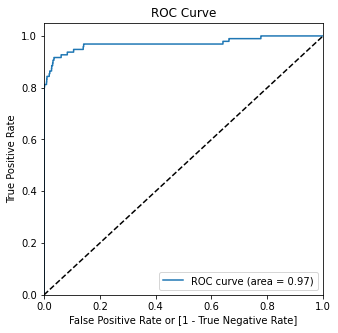

In [120]:
# Predicted probability
y_test_pred_proba = xgb_optimal_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## XGBoost with random oversampleing - Model summary 
### Train set score 
- ROC score 100 %
- F1 score 100 %

### Test set score
- ROC score 97 %
- F1 score 37 %

### Print the class distribution after applying SMOTE

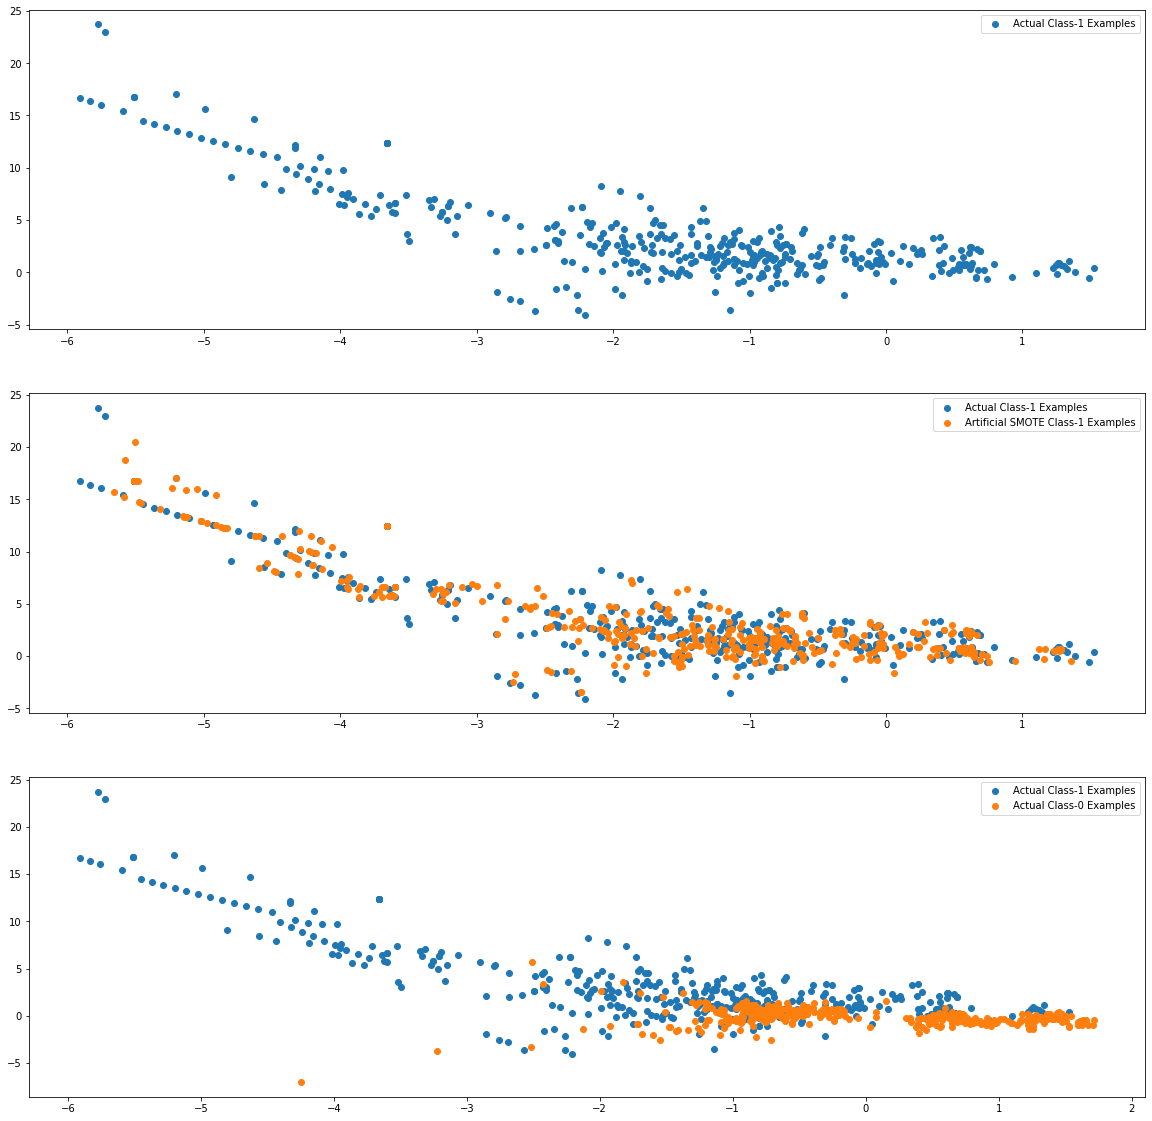

In [121]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

##### Build models on other algorithms to see the better performing on SMOTE

# Logistic regrssion with SMOTE on balanced data

In [122]:
# Creating KFold object with 5 splits
splits = 5
folds = KFold(n_splits=splits, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
lr_model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [123]:
# Optimal ROC curve score and hyperparameter Logistic regression with SMOTE
print('ROC AUC score: ', round(lr_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', lr_model_cv.best_params_)
print(lr_model_cv.best_estimator_)

ROC AUC score:  0.99
Hyperparameters:  {'C': 0.1}
LogisticRegression(C=0.1)


In [124]:
# cross validation results
lr_model_cv_results = pd.DataFrame(lr_model_cv.cv_results_)
lr_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.513862,0.044439,0.044074,0.001206,0.01,{'C': 0.01},0.990278,0.989829,0.990046,0.989499,0.989786,0.989888,0.000262,6,0.989828,0.989867,0.989874,0.990034,0.989909,0.989902,0.000071
1,2.528204,0.033677,0.048948,0.005056,0.1,{'C': 0.1},0.990280,0.989842,0.990062,0.989490,0.989813,0.989897,0.000264,1,0.989843,0.989880,0.989880,0.990039,0.989920,0.989912,0.000068
2,2.633947,0.073892,0.045301,0.002750,1,{'C': 1},0.990278,0.989842,0.990062,0.989487,0.989815,0.989897,0.000265,2,0.989843,0.989880,0.989879,0.990037,0.989919,0.989912,0.000067
3,2.575186,0.090382,0.048831,0.004678,10,{'C': 10},0.990278,0.989842,0.990062,0.989486,0.989815,0.989896,0.000265,5,0.989843,0.989880,0.989879,0.990037,0.989919,0.989912,0.000067
4,2.542098,0.090683,0.044027,0.001619,100,{'C': 100},0.990278,0.989842,0.990062,0.989486,0.989815,0.989896,0.000265,4,0.989843,0.989880,0.989879,0.990037,0.989919,0.989912,0.000067
5,2.543524,0.091932,0.044523,0.002393,1000,{'C': 1000},0.990278,0.989842,0.990062,0.989486,0.989815,0.989896,0.000265,3,0.989843,0.989880,0.989879,0.990037,0.989919,0.989912,0.000067


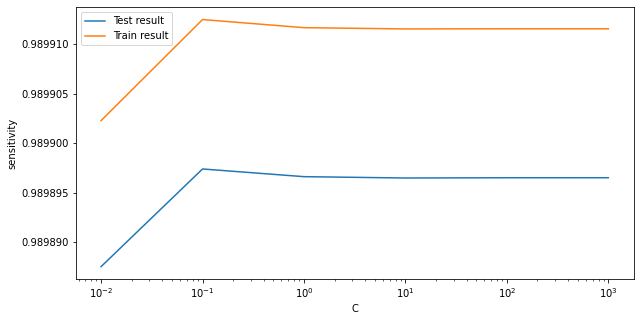

In [125]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 5))
plt.plot(lr_model_cv_results['param_C'], lr_model_cv_results['mean_test_score'])
plt.plot(lr_model_cv_results['param_C'], lr_model_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

In [126]:
# Instantiating the model
lr_smote_model = LogisticRegression(C=0.1)

# Fitting the model with balanced data
lr_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1)

## model Evaluation on Train set

In [127]:
# Evaluating model on train set
y_train_pred = lr_smote_model.predict(X_train_smote)
print('Classification report:\n',classification_report(y_train_smote, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



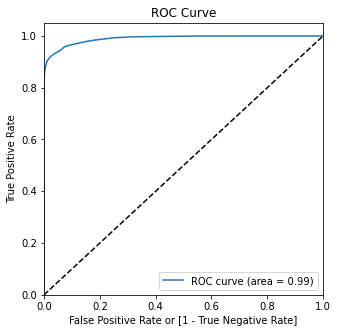

In [128]:
# Predicted probability
y_train_pred_proba_smote = lr_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roccurve(y_train_smote, y_train_pred_proba_smote)

## model evaluation on test set

In [129]:
# Evaluating on test data
y_test_pred = lr_smote_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



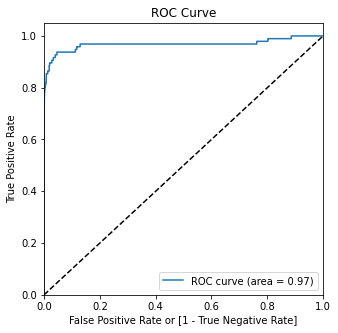

In [130]:
# Predicted probability
y_test_pred_proba_smote = lr_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba_smote)

## Logistic regression  with SMOTE - Model summary 
### Train set score
- ROC score 99 %
- F1 score 95 %

### Test set score
- ROC score 97 %
- F1 score 11 %

# Decision tree with SMOTE on balanced data

In [131]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dt = DecisionTreeClassifier()

dt_grid_search = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
dt_grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [132]:
# Optimal ROC curve score and hyperparameter Decision tree classifier with SMOTE
print('ROC AUC score: ', round(dt_grid_search.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', dt_grid_search.best_params_)
print(dt_grid_search.best_estimator_)

ROC AUC score:  0.998
Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [133]:
# cross validation results
dtc_model_cv_results = pd.DataFrame(dt_grid_search.cv_results_)
dtc_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.485865,0.020724,0.076694,0.005174,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986484,0.985618,0.985514,0.985872,0.000435,6
1,9.427211,0.034003,0.073436,0.003033,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986484,0.985651,0.985512,0.985882,0.000429,5
2,9.423497,0.033991,0.074770,0.004914,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986431,0.985627,0.985452,0.985837,0.000426,8
3,9.408363,0.075716,0.076795,0.004100,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986455,0.985627,0.985447,0.985843,0.000439,7
4,17.649859,0.150041,0.080098,0.003357,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997788,0.997946,0.997467,0.997734,0.000199,2
5,17.526903,0.145579,0.080946,0.003439,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997777,0.997924,0.997496,0.997732,0.000178,3
6,17.576980,0.134015,0.081390,0.004330,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997830,0.997928,0.997438,0.997732,0.000212,4
7,17.448040,0.085271,0.068623,0.012260,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997867,0.997925,0.997511,0.997767,0.000183,1


In [134]:
# build model with optimal hyperparameter
dtc_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dtc_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

# Model Evaluation
- Prediction on train set

In [135]:
# Predictions on the train set
y_train_pred_smote = dtc_smote_model.predict(X_train_smote)
print('Classification report:\n',classification_report(y_train_smote, y_train_pred_smote))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



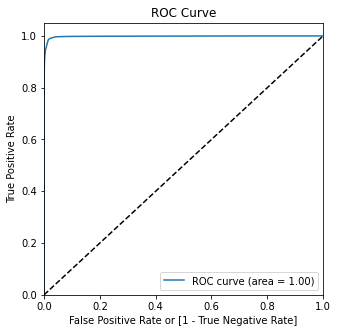

In [136]:
# Predicted probability
y_train_pred_proba = dtc_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roccurve(y_train_smote, y_train_pred_proba)

## Model Evaluation
- Prediction on Test set 

In [137]:
# Predictions on the Test set
y_test_pred_smote = dtc_smote_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred_smote))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.78      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.56     56962
weighted avg       1.00      0.98      0.99     56962



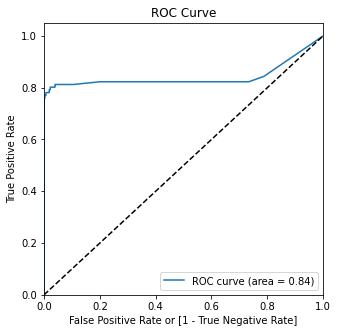

In [138]:
# Predicted probability
y_test_pred_proba = dtc_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Decision tree classifie  with SMOTE - Model summary 
### Train set score
- ROC score 100 %
- F1 score 99 %

### Test set score
- ROC score 84 %
- F1 score 12 %

# XGBoost with SMOTE on balanced data

In [139]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
xgb_model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [140]:
# Optimal ROC curve score and hyperparameter XGBoost with SMOTE
print('ROC AUC score: ', round(xgb_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', xgb_model_cv.best_params_)
print(xgb_model_cv.best_estimator_)

ROC AUC score:  1.0
Hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.6}
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.6)


In [141]:
# cross validation results
xgb_model_cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
xgb_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,68.147991,0.136870,0.741258,0.003050,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999682,0.999756,0.999703,0.999714,0.000031,4,0.999743,0.999740,0.999736,0.999740,2.772898e-06
1,86.631842,0.162882,0.744276,0.011453,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999687,0.999758,0.999650,0.999698,0.000045,6,0.999738,0.999753,0.999723,0.999738,1.194556e-05
2,93.340209,0.206285,0.732208,0.014661,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999681,0.999739,0.999691,0.999704,0.000025,5,0.999727,0.999731,0.999747,0.999735,8.458847e-06
3,67.829705,0.176103,0.758898,0.013959,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999951,0.999955,0.999951,0.999952,0.000002,3,0.999976,0.999976,0.999977,0.999976,5.111610e-07
4,86.196238,0.143188,0.747847,0.002624,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999967,0.999962,0.999959,0.999963,0.000003,1,0.999983,0.999987,0.999983,0.999984,1.993600e-06
5,93.329205,0.495774,0.750265,0.008289,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999963,0.999957,0.999955,0.999958,0.000003,2,0.999982,0.999982,0.999984,0.999983,1.060060e-06


In [142]:
#  build model with optimal hyperparameter
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# instanciate Model
xgb_smote_model = XGBClassifier(params = params)

# fit model on training data
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

## model Evaluation
- Prediction on train set

In [143]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
print('Classification report:\n',classification_report(y_train_smote, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    227449
           1       0.99      0.97      0.98    227449

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898



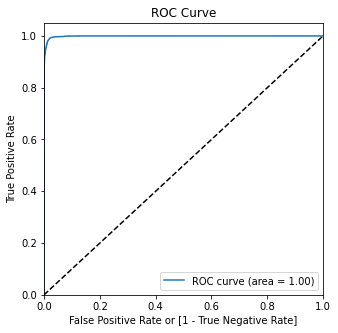

In [144]:
# Predicted probability.
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plotting the ROC curve
plot_roccurve(y_train_smote, y_train_pred_proba)

## Model Evaluation
- Prediction on Test set

In [145]:
y_pred = xgb_smote_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.83      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



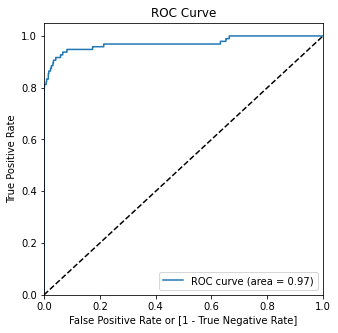

In [146]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## XGBoost with SMOTE on balanced data set - Model summary 
### Train set score
- ROC score 100 %
- F1 score 98 %

### Test set score
- ROC score 97 %
- F1 score 19 %

### Print the class distribution after applying ADASYN

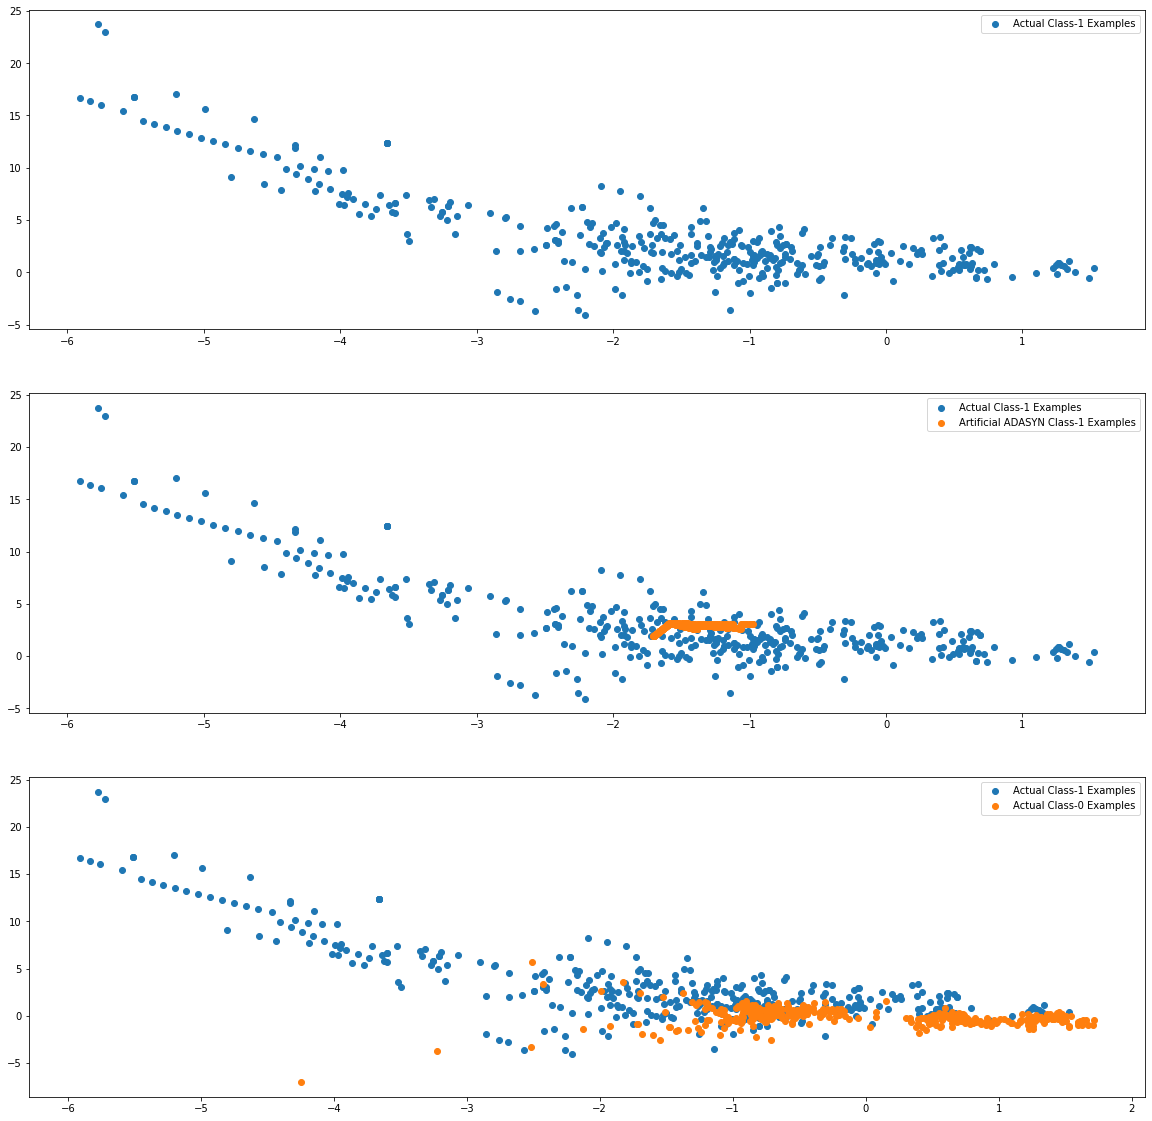

In [147]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

#### Build models on other algorithms to see the better performing on ADASYN

# Logistic regression with ADASYN on balanced data

In [148]:
# Creating KFold object with 3 splits
splits = 3
folds = KFold(n_splits=splits, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
lr_model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [149]:
# Optimal ROC curve score and hyperparameter Logistic regression with ADASYN
print('ROC AUC score: ', round(lr_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', lr_model_cv.best_params_)
print(lr_model_cv.best_estimator_)

ROC AUC score:  0.964
Hyperparameters:  {'C': 1000}
LogisticRegression(C=1000)


In [150]:
# cross validation results
lr_model_cv_results = pd.DataFrame(lr_model_cv.cv_results_)
lr_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.884553,0.067520,0.072731,0.001698,0.01,{'C': 0.01},0.963866,0.963585,0.964221,0.963891,0.000260,6,0.963869,0.963928,0.963940,0.963912,0.000031
1,2.081528,0.015026,0.078416,0.004389,0.1,{'C': 0.1},0.963957,0.963668,0.964301,0.963976,0.000259,5,0.963960,0.964007,0.964019,0.963995,0.000026
2,2.162418,0.143814,0.076511,0.004741,1,{'C': 1},0.963962,0.963674,0.964306,0.963981,0.000259,4,0.963965,0.964011,0.964025,0.964001,0.000026
3,2.173985,0.160278,0.071339,0.000529,10,{'C': 10},0.963963,0.963674,0.964307,0.963981,0.000259,3,0.963966,0.964012,0.964026,0.964001,0.000026
4,2.167281,0.172129,0.072414,0.001383,100,{'C': 100},0.963963,0.963674,0.964307,0.963981,0.000259,2,0.963966,0.964012,0.964026,0.964001,0.000026
5,2.179935,0.185689,0.078175,0.004971,1000,{'C': 1000},0.963963,0.963674,0.964307,0.963981,0.000259,1,0.963966,0.964012,0.964026,0.964001,0.000026


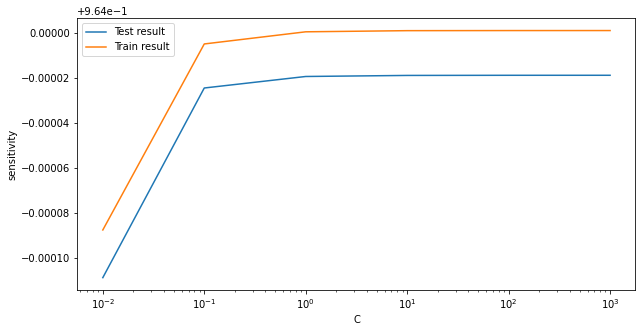

In [151]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 5))
plt.plot(lr_model_cv_results['param_C'], lr_model_cv_results['mean_test_score'])
plt.plot(lr_model_cv_results['param_C'], lr_model_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

In [152]:
lr_model_cv.best_estimator_

LogisticRegression(C=1000)

In [153]:
# Instantiating the model
lr_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
lr_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

## Model Evaluation
- Prediction on train set

In [154]:
# Evaluating on test data
y_train_pred = lr_adasyn_model.predict(X_train_adasyn)
print('Classification report:\n',classification_report(y_train_adasyn, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227446

    accuracy                           0.89    454895
   macro avg       0.89      0.89      0.89    454895
weighted avg       0.89      0.89      0.89    454895



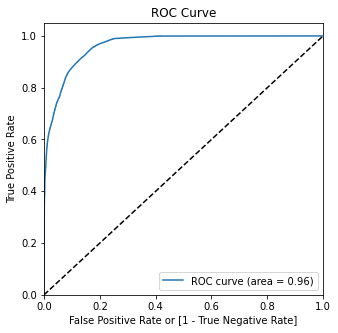

In [155]:
# Predicted probability
y_train_pred_proba = lr_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plotting the ROC curve
plot_roccurve(y_train_adasyn, y_train_pred_proba)

## Model evaluation
- Prediction on test set

In [156]:
# Evaluating on test data
y_test_pred = lr_adasyn_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



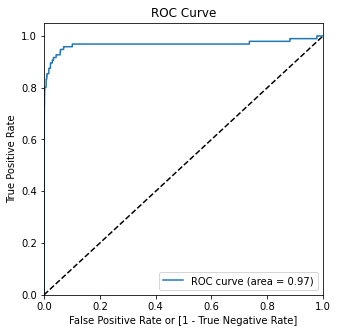

In [157]:
# Predicted probability
y_test_pred_proba = lr_adasyn_model.predict_proba(X_test)[:,1]
# Plotting the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Logistic regression with ADASYN on balanced data set - Model summary 
### Train set score
- ROC score 96 %
- F1 score 88 %

### Test set score
- ROC score 97 %
- F1 score 3 %

# Decision  tree classifier with ADASYN on balanced dataset 

In [158]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtc = DecisionTreeClassifier()

dtc_grid_search = GridSearchCV(estimator = dtc, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
dtc_grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [159]:
# Optimal ROC curve score and hyperparameter Logistic regression with ADASYN
print('ROC AUC score: ', round(dtc_grid_search.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', dtc_grid_search.best_params_)
print(dtc_grid_search.best_estimator_)

ROC AUC score:  0.946
Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [160]:
# cross validation results
dtc_grid_search_results = pd.DataFrame(dtc_grid_search.cv_results_)
dtc_grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.336926,0.036862,0.044601,0.002673,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.910244,0.924603,0.926032,0.909250,0.907981,0.915622,0.007961,8
1,11.168339,0.093750,0.044349,0.001302,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.910244,0.924603,0.926033,0.909250,0.907991,0.915624,0.007960,7
2,11.229359,0.041418,0.042889,0.000891,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.910116,0.925052,0.925936,0.909857,0.907963,0.915785,0.007967,6
3,11.195245,0.056179,0.045942,0.001797,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.910120,0.925052,0.925985,0.910456,0.907962,0.915915,0.007893,5
4,20.075176,0.185284,0.049606,0.002563,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917198,0.937413,0.942326,0.929514,0.967145,0.938719,0.016557,4
5,20.038993,0.108700,0.047683,0.002845,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.918775,0.937387,0.945500,0.933344,0.968699,0.940741,0.016448,3
6,20.095733,0.208366,0.047211,0.001890,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.923566,0.943706,0.945545,0.947869,0.967962,0.945730,0.014101,1
7,19.995109,0.278225,0.043199,0.005047,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.931724,0.940015,0.936749,0.944489,0.967789,0.944153,0.012532,2


In [161]:
# Build Model with optimal hyperparameters
dtc_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dtc_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

## model evaluation
- prediction on train set

In [162]:
# Evaluating model on the test data
y_train_pred = dtc_adasyn_model.predict(X_train_adasyn)
print('Classification report:\n',classification_report(y_train_adasyn, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97    227449
           1       0.96      0.99      0.97    227446

    accuracy                           0.97    454895
   macro avg       0.97      0.97      0.97    454895
weighted avg       0.97      0.97      0.97    454895



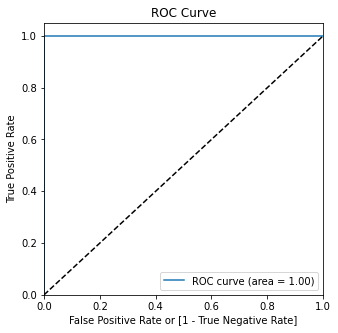

In [163]:
# Predicted probability
y_train_pred_proba = dtc_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plotting the ROC curve
plot_roccurve(y_train_pred, y_train_pred_proba)

## model evaluation
- prediction on test set

In [164]:
# Evaluating model on the test data
y_test_pred = dtc_adasyn_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.03      0.79      0.06        96

    accuracy                           0.96     56962
   macro avg       0.52      0.87      0.52     56962
weighted avg       1.00      0.96      0.98     56962



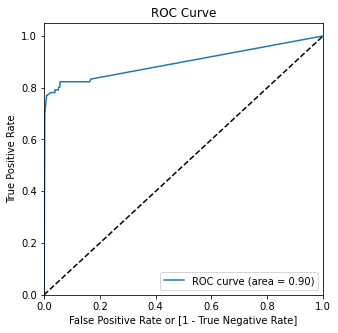

In [165]:
# Predicted probability
y_test_pred_proba = dtc_adasyn_model.predict_proba(X_test)[:,1]
# Plotting the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Decision tree classifier with ADASYN on balanced data set - Model summary 
### Train set score
- ROC score 100 %
- F1 score 97 %

### Test set score
- ROC score 90 %
- F1 score 6 %

# XGboost with ADASYN on balanced data set

In [166]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

# fit the model
xgb_model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [167]:
# Optimal ROC curve score and hyperparameter Logistic regression with ADASYN
print('ROC AUC score: ', round(xgb_model_cv.best_score_,3))

# print the optimum value of hyperparameters
print('Hyperparameters: ', xgb_model_cv.best_params_)

print(xgb_model_cv.best_estimator_)

ROC AUC score:  0.99
Hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.3}
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.3)


In [168]:
# cross validation results
xgb_model_cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
xgb_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,66.103438,0.608735,0.773664,0.024625,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.966345,0.995994,0.994283,0.985541,0.013591,6,0.999359,0.999187,0.999225,0.999257,0.000074
1,84.175349,0.379682,0.758642,0.003673,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.969245,0.995401,0.993432,0.986026,0.011893,5,0.999307,0.999019,0.999121,0.999149,0.000120
2,92.255750,1.411950,0.770970,0.020306,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.969367,0.996384,0.993513,0.986421,0.012116,4,0.999363,0.999107,0.999168,0.999213,0.000109
3,66.155458,1.095050,0.773036,0.013884,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.975120,0.998606,0.996501,0.990076,0.010610,1,0.999915,0.999952,0.999965,0.999944,0.000021
4,84.389186,0.432221,0.763545,0.003143,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.968993,0.997648,0.997339,0.987993,0.013436,2,0.999938,0.999955,0.999953,0.999949,0.000007
5,91.673259,0.672437,0.768261,0.005202,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.964176,0.997370,0.998188,0.986578,0.015844,3,0.999949,0.999936,0.999957,0.999947,0.000009


In [169]:
# Build model using chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

## model Evaluation
- Prediction on train set

In [170]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
print('Classification report:\n',classification_report(y_train_adasyn, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    227449
           1       0.97      0.99      0.98    227446

    accuracy                           0.98    454895
   macro avg       0.98      0.98      0.98    454895
weighted avg       0.98      0.98      0.98    454895



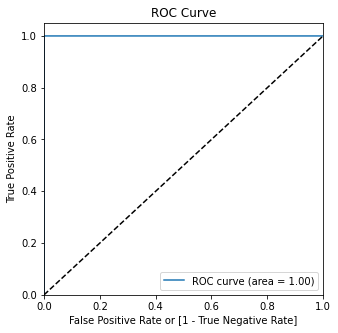

In [171]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plotting the ROC curve
plot_roccurve(y_train_pred, y_train_pred_proba)

In [172]:
# Predicting on the train set
y_test_pred = xgb_adasyn_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.89      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962



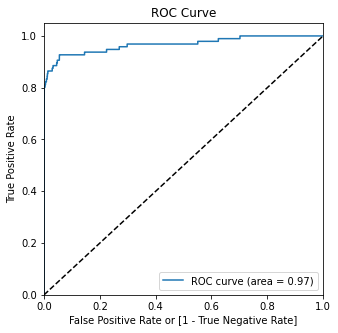

In [173]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

In [174]:
# Accuracy
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))
print('Classification report:\n',classification_report(y_test, y_test_pred))
print('F1 Score: ', f1_score(y_test, y_test_pred))



[[54896  1970]
 [   11    85]]
Accuracy:- 0.9652224289877462
Sensitivity:- 0.8854166666666666
Specificity:- 0.9653571554180002
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.89      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962

F1 Score:  0.07903300790330078


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


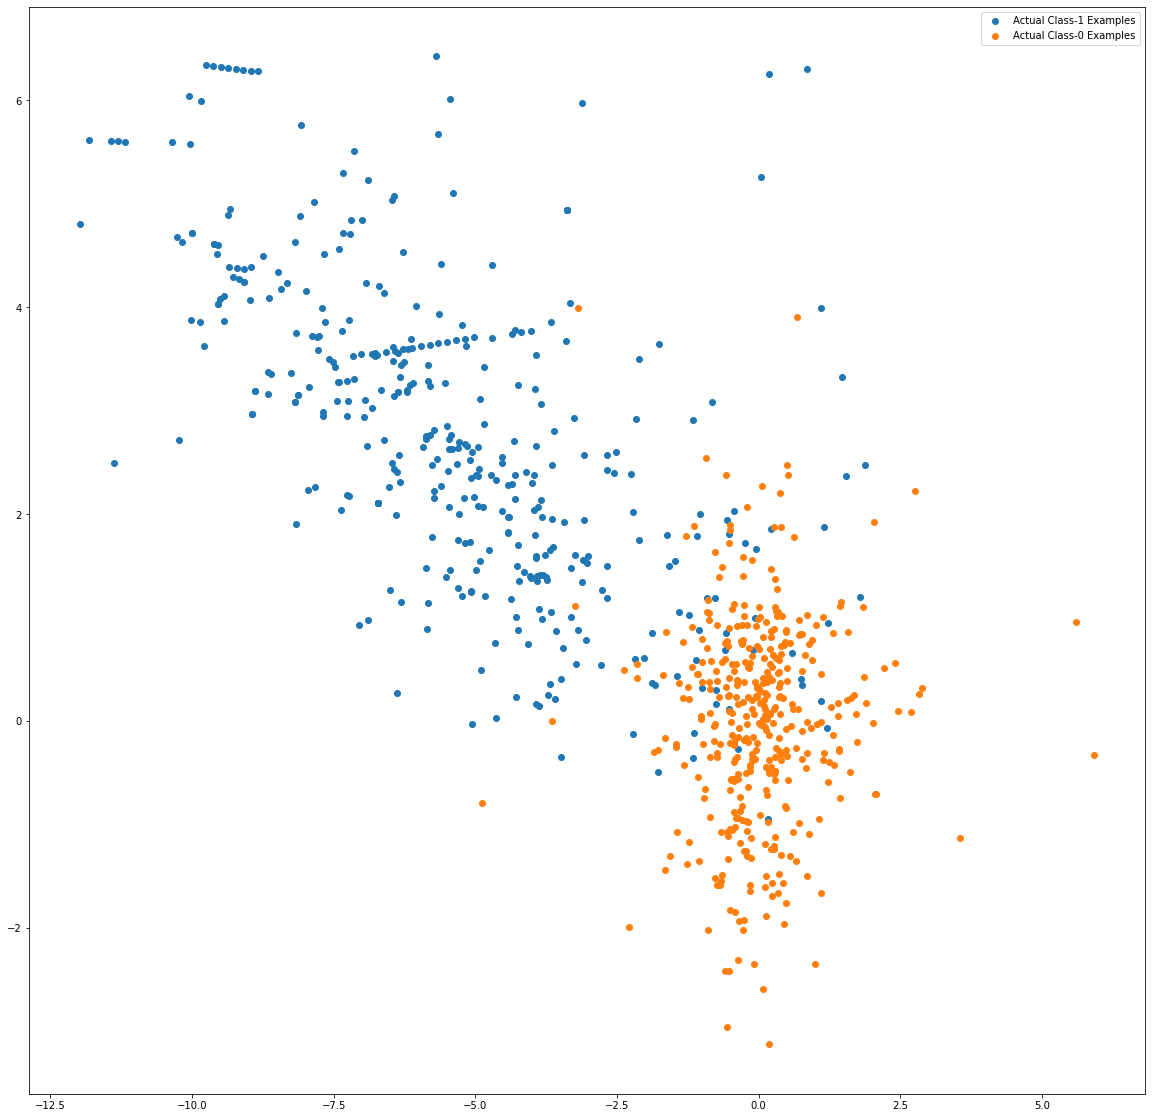

In [175]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [176]:
#### Print the FPR,TPR & select the best threshold from the roc curve

print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9967616542723794
0.54578215


Observation
- 100%  auc score on training data set
- 54 % is threshold where TPR is highest and FPR is lowest

## Summary
- ###  To detect actual fraudulent transactions we need to focus on high recall.
- ### Out of all the models evaluation, XGBoost model has good ROC score.